# Assignment 5, Question 5: Missing Data Analysis

**Points: 15**

Apply and compare different missing data strategies on the clinical trial dataset.

## Setup

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities from Q3
from q3_data_utils import load_data, detect_missing, fill_missing, clean_data

# Load the data
df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for missing data
def visualize_missing_data(missing_counts):
    """
    Create a bar chart of missing values by column.
    
    Args:
        missing_counts: pandas Series with missing value counts per column
    """
    plt.figure(figsize=(10, 6))
    missing_counts.plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.xticks(rotation=45)
    plt.ylabel('Number of Missing Values')
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Detect Missing Data (3 points)

1. Use the `detect_missing()` utility to find missing values
2. Visualize missing data with a bar plot
3. Calculate the percentage of missing values per column

Missing Values Count per Column: patient_id               0
age                    200
sex                      0
bmi                    626
enrollment_date          0
systolic_bp            414
diastolic_bp           414
cholesterol_total      554
cholesterol_hdl        554
cholesterol_ldl        554
glucose_fasting        369
site                     0
intervention_group       0
follow_up_months         0
adverse_events           0
outcome_cvd              0
adherence_pct         1467
dropout                  0
dtype: int64
Missing Values Percentage per Column: patient_id             0.00
age                    2.00
sex                    0.00
bmi                    6.26
enrollment_date        0.00
systolic_bp            4.14
diastolic_bp           4.14
cholesterol_total      5.54
cholesterol_hdl        5.54
cholesterol_ldl        5.54
glucose_fasting        3.69
site                   0.00
intervention_group     0.00
follow_up_months       0.00
adverse_events         0.00
outcome_cv

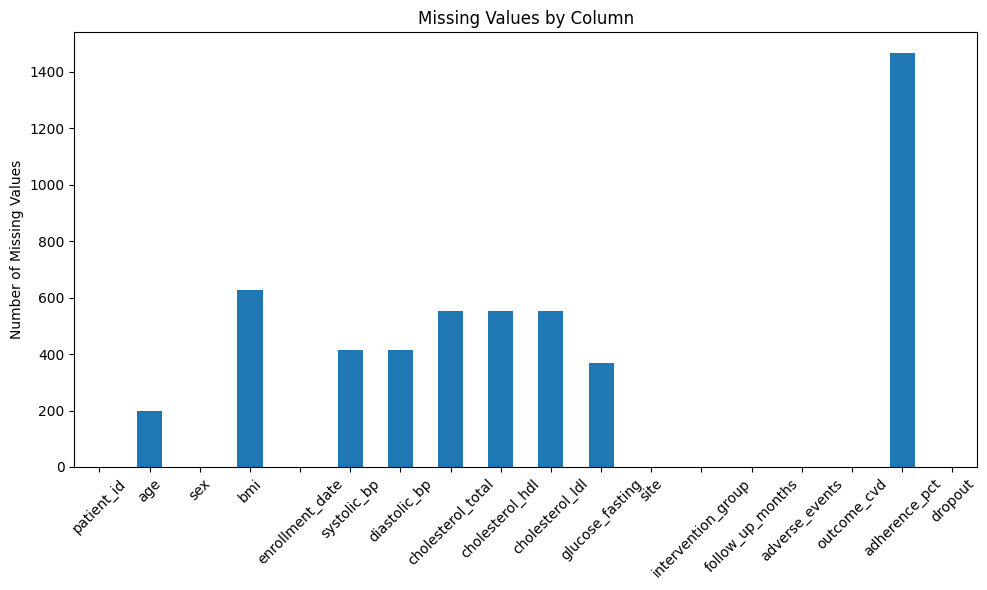

In [9]:
# Detect and analyze missing data
# 1. Use detect_missing(df) to get missing value counts
# 2. Calculate percentage of missing values per column  
# 3. Print both counts and percentages
# 4. Identify which columns have missing data
df = clean_data(df, remove_duplicates=False)
missing_counts = detect_missing(df)
missing_percentages = (missing_counts / len(df)) * 100
print("Missing Values Count per Column:", missing_counts)
print("Missing Values Percentage per Column:", missing_percentages)

# Identify columns with missing data
columns_with_missing = missing_counts[missing_counts > 0].index.tolist()
print("Columns with Missing Data:", columns_with_missing)

# Optional: Use the visualization function above to create a bar chart
visualize_missing_data(missing_counts)


## Part 2: Compare Imputation Strategies (6 points)

For the 'cholesterol_total' column (which has missing values):

1. Fill with mean using `fill_missing()` utility
2. Fill with median using `fill_missing()` utility  
3. Forward fill using pandas `.fillna(method='ffill')`
4. Compare the three strategies - create a summary table showing:
   - Original mean/median
   - Mean/median after each strategy
   - How many values were filled

In [10]:
# Compare imputation strategies
col = 'cholesterol_total'
data_summary = []

# Data from original
original = df[col]
original_missing_num = detect_missing(df)[col]
data_summary.append([original.mean(), original.median(), 0])

# 1) Fill with mean using utility
mean_filled = fill_missing(df, col, strategy='mean')
mean_filled_missing_num = detect_missing(mean_filled)[col]
data_summary.append([mean_filled[col].mean(), mean_filled[col].median(), original_missing_num - mean_filled_missing_num])

# 2) Fill with median using utility
median_filled = fill_missing(df, col, strategy='median')
median_filled_missing_num = detect_missing(median_filled)[col]
data_summary.append([median_filled[col].mean(), median_filled[col].median(), original_missing_num - median_filled_missing_num])

# 3) Forward fill using pandas
pandas_temp = df
pandas_filled = pandas_temp[[col]].ffill()
pandas_filled_missing_num = detect_missing(pandas_filled)[col]
data_summary.append([pandas_filled[col].mean(), pandas_filled[col].median(), original_missing_num - pandas_filled_missing_num])

summary_table = pd.DataFrame(data_summary, columns=['Mean', 'Median', 'Values Filled'], index=['Original', 'Mean Filled', 'Median Filled', 'Forward Fill'])
print(summary_table)


                     Mean      Median  Values Filled
Original       178.039488  177.000000              0
Mean Filled    178.039488  178.039488            554
Median Filled  177.981900  177.000000            554
Forward Fill   178.070500  177.000000            554


## Part 3: Dropping Missing Data (3 points)

1. Drop rows where ANY column has missing data - how many rows remain?
2. Drop rows where specific columns have missing data (e.g., only 'age' or 'bmi')
3. Which approach loses less data?

In [11]:
# Drop missing rows with different strategies

# Create new dataframe without rows that have missing values in specified columns
df_no_missing_rows = df.dropna()
print('Rows after dropping with any missing values:', len(df_no_missing_rows))

# Create new dataframe without rows that have missing values in specific columns
df_complete_age_bmi = df.dropna(subset=['age', 'bmi'])
print('Rows after dropping with missing age & bmi values:', len(df_complete_age_bmi))


Rows after dropping with any missing values: 6843
Rows after dropping with missing age & bmi values: 9188


3. Which approach loses less data?

The second approach where I've specified to drop rows where the age and bmi cols have missing data.

## Part 4: Create Clean Dataset (3 points)

Apply your chosen strategy to create a clean dataset:
1. Choose appropriate imputation for numeric columns
2. Drop rows with missing critical values (e.g., patient_id, age)
3. Save to `output/q5_cleaned_data.csv`
4. Save a missing data report to `output/q5_missing_report.txt`

In [12]:
# Create and save clean dataset
# Columns to impute
# cols_impute = ['bmi', 'systolic_bp', 'diastolic_bp', 'cholesterol_total', 
#         'cholesterol_hdl', 'cholesterol_ldl', 'glucose_fasting']

# Columns to drop, critical missingness
cols_drop = ['adherence_pct']

# Fill missing values with each column's median
df[columns_with_missing] = df[columns_with_missing].fillna(df[columns_with_missing].median())

# Check missing values after imputation
missing_counts_impute = df.isna().sum()
print(missing_counts_impute)

# Drop rows with missing values in critical columns
df = df.dropna(subset=cols_drop)

# Save cleaned dataset
df.to_csv('output/q5_cleaned_data.csv', index=False)

# Missing data report
print('Missing Data Report')
missing_report = df.isna().sum()
missing_report.to_string(buf='output/q5_missing_report.txt')




patient_id            0
age                   0
sex                   0
bmi                   0
enrollment_date       0
systolic_bp           0
diastolic_bp          0
cholesterol_total     0
cholesterol_hdl       0
cholesterol_ldl       0
glucose_fasting       0
site                  0
intervention_group    0
follow_up_months      0
adverse_events        0
outcome_cvd           0
adherence_pct         0
dropout               0
dtype: int64


Missing Data Report


## Reflection

Which imputation strategy would you recommend for this dataset and why?

**Your answer:**

Median imputation was chosen instead of mean imputation because it is more robust to outliers while still preserving the central tendency of the data. This approach is well-suited for cross-sectional datasets without repeated measures, where maintaining the overall distribution and minimizing distortion from extreme values is important. Since the data do not appear to have a longitudinal structure, forward fill is not justified. The variable adherence_pct was excluded from imputation because it is likely an outcome-related measure with a high proportion of missing values, and imputing it could introduce bias into the analysis.